<a href="https://colab.research.google.com/github/Aayushee07/AdsLabs/blob/main/p_ads_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


path = '/content/Rainfall_data.csv'

df = pd.read_csv(path)

df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


In [ ]:
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# First, convert the 'Year', 'Month', and 'Day' columns to strings
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str)
df['Day'] = df['Day'].astype(str)

# Combine 'Year', 'Month', and 'Day' columns into a single 'Date' column
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

# Drop the individual 'Year', 'Month', and 'Day' columns if needed
df = df.drop(['Year', 'Month', 'Day'], axis=1)

# Display the DataFrame with the new 'Date' column
print(df)


     Specific Humidity  Relative Humidity  Temperature  Precipitation  \
0                 8.06              48.25        23.93           0.00   
1                 8.73              50.81        25.83           0.11   
2                 8.48              42.88        26.68           0.01   
3                13.79              55.69        22.49           0.02   
4                17.40              70.88        19.07         271.14   
..                 ...                ...          ...            ...   
247              20.08              92.31         5.34        1203.09   
248              19.71              90.12         9.22         361.30   
249              18.43              82.69        12.62         180.18   
250              14.83              76.06        16.95           0.49   
251              12.21              69.38        17.77          12.23   

          Date  
0   2000-01-01  
1   2000-02-01  
2   2000-03-01  
3   2000-04-01  
4   2000-05-01  
..         ...  
247 

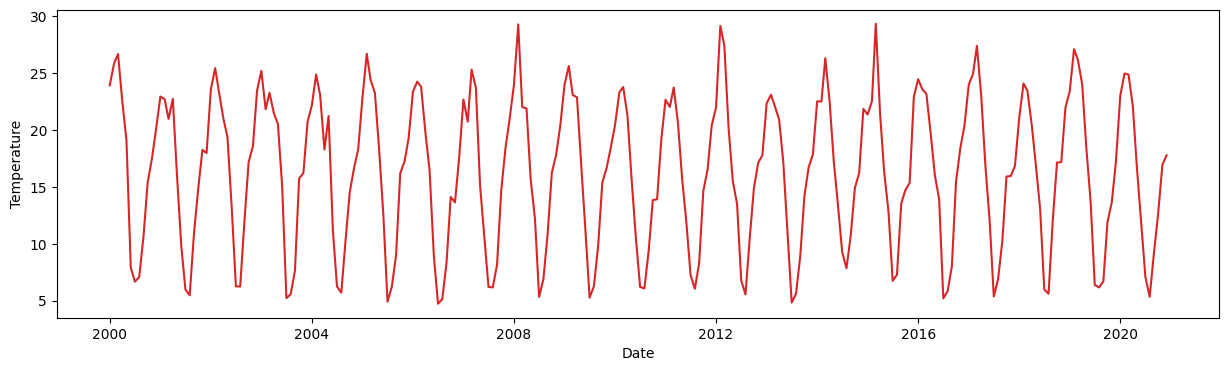

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Temperature', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['Temperature'], title='')

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# # Convert index to datetime if not already done
# df.index = pd.to_datetime(df.index)

# Split data into train and test sets
train_data = df[3:int(len(df)*0.9)]  # Training data from index 3 to 90% of the length
test_data = df[int(len(df)*0.9):]  # Testing data from 90% of the length to the end

# # Plotting (optional)
# plt.figure(figsize=(10,6))
# plt.grid(True)
# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.plot(train_data.index, train_data['Temperature'], 'green', label='Train data')
# plt.plot(test_data.index, test_data['Temperature'], 'blue', label='Test data')
# plt.legend()
# plt.show()


In [ ]:
# Fit auto ARIMA model
model_autoARIMA = auto_arima(df['Temperature'], start_p=0, start_q=0,
                             test='adf',  # use adftest to find optimal 'd'
                             max_p=3, max_q=3,  # maximum p and q
                             m=1,  # frequency of series
                             d=None,  # let model determine 'd'
                             seasonal=False,  # No Seasonality
                             start_P=0,
                             D=0,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

# Print summary
print(model_autoARIMA.summary())



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2162.307, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1427.581, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1872.278, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1359.423, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1361.393, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1361.406, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1377.204, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1362.482, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1279.072, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1404.890, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1238.938, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1170.088, Time=1.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1172.773, Time=0.50 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1175.879, Time=0.78 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-22-0e191a1ed69c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["predicted_temp"] = forecast


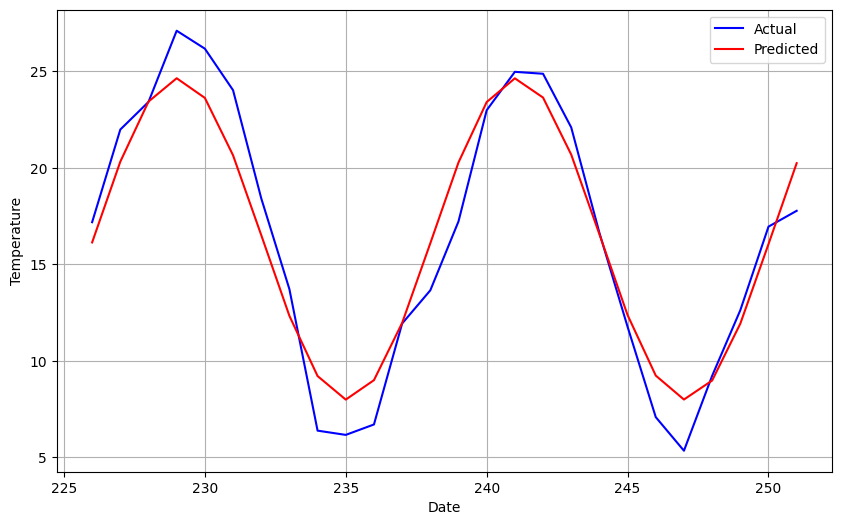

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Assuming the columns are named "Date" and "No. of Passengers"
date = pd.to_datetime(train_data["Date"])
passengers = train_data["Temperature"]

# Fit ARIMA model with identified parameters (replace with your identified p, d, and q)
model = ARIMA(passengers, order=(2, 0, 2))
model_fit = model.fit()

# Generate forecasts for the same dates as the test data
forecast = model_fit.forecast(steps=len(test_data))

# Create a new column in the test data for predicted values
test_data["predicted_temp"] = forecast

# Plot actual and predicted values for the test data
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.plot(test_data.index, test_data['Temperature'], 'blue', label='Actual')
plt.plot(test_data.index, test_data['predicted_temp'], 'red', label='Predicted')
plt.legend()
plt.show()

In [ ]:
forecast = model_fit.forecast(steps=20)

print("Predicted number of passengers for the next 20 months:")
print(forecast)


Predicted number of passengers for the next 20 months:
226    16.131568
227    20.315794
228    23.428724
229    24.637680
230    23.619359
231    20.646295
232    16.513918
233    12.327741
234     9.207608
235     7.988124
236     8.995407
237    11.959878
238    16.088404
239    20.276503
240    23.403817
241    24.633818
242    23.637575
243    20.681714
244    16.557065
245    12.367073
Name: predicted_mean, dtype: float64
